In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor as GPR

In [2]:
data = dict(np.load('outputs.npz'))

In [66]:
target = data['ig']

In [65]:
inputs = data['theta_data']
lat_range = data['lat_range']
long_range = data['long_range']

In [71]:
target = target.reshape(len(inputs),-1).mean(axis=1)

In [73]:
target.shape

(20,)

In [72]:
target

array([ 2.49446609e+00, -1.22124533e-16, -1.77635684e-16,  0.00000000e+00,
        1.49786614e+00,  2.99573137e+00,  9.05330302e-01,  2.58573272e+00,
       -1.77635684e-16,  2.34907508e+00,  1.33076800e+00, -5.55111512e-17,
       -1.11022302e-16,  2.99206648e+00,  6.54379842e-27, -1.11022302e-17,
        1.26621297e+00, -1.33226763e-16,  1.97784718e+00,  2.71634454e+00])

In [74]:
model = GPR()
model.fit(inputs,target)

xy = np.mgrid[lat_range[0]:lat_range[1]:0.01, 
              long_range[0]:long_range[1]:0.01].reshape(2,-1 ).T

In [7]:
preds = model.predict(xy)

In [75]:
xy

array([[  40.  , -112.  ],
       [  40.  , -111.99],
       [  40.  , -111.98],
       ...,
       [  41.99, -108.4 ],
       [  41.99, -108.39],
       [  41.99, -108.38]])

In [18]:
preds = model.predict(xy)

In [20]:
preds

array([ 4.78426883,  4.68939609,  4.59970543, ..., 27.40195158,
       27.82679668, 28.25118663])

In [ ]:
np.mgrid[lat_range[0]:lat_range[1]:0.01, 
              long_range[0]:long_range[1]:0.01].shape

In [45]:
x = np.linspace(lat_range[0], lat_range[1], 100)
y = np.linspace(long_range[0], long_range[1], 100)

xv, yv = np.meshgrid(x, y)

In [50]:
preds = model.predict(np.vstack([xv.ravel(), yv.ravel()]).T)

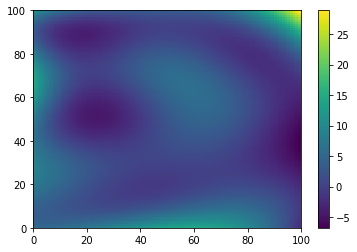

In [55]:
plt.pcolormesh(preds.reshape(100,100))
plt.colorbar()
plt.show()

TypeError: pcolormesh() takes 1 or 3 positional arguments but 2 were given

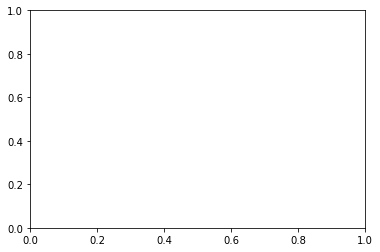

In [62]:
plt.pcolormesh(inputs,target)

In [60]:
target.shape

(20,)